
wine qualityデータセットを使って、qualityを推論するネットワークを構築

In [ ]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/221001/winequality-red.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
x = x.values
y = y.values

In [ ]:
x.shape

(1599, 11)

In [ ]:
y.shape

(1599,)

In [ ]:
list(set(y))

[3, 4, 5, 6, 7, 8]

In [ ]:
# ラベルの性質 3, 4, 5→0, 1, 2となるため、それに変換をする
y_dict_values = range(0, 6)
y_dict_keys = list(set(y))
y_dict = dict(zip(y_dict_keys,y_dict_values))

In [ ]:
y_dict

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [ ]:
y_labels = np.array([])
for num in range(len(y)):
  work = y[num]
  y_label = y_dict[work]
  y_labels = np.append(y_labels, y_label)


In [ ]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [ ]:
y_labels

array([2., 2., 2., ..., 3., 2., 3.])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_labels, test_size=0.2)

In [ ]:
# パラメータ

# 入力次元数
n_input = x_train.shape[1]

# 出力次元数
n_output = len(list(set(y_train)))

print(f"n_input : {n_input} n_output : {n_output}")

n_input : 11 n_output : 6


In [ ]:
# モデル定義

class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, 20)
    self.l2 = nn.Linear(20, 10)
    self.l3 = nn.Linear(10, n_output)
    self.relu = nn.ReLU(inplace=True)

    # 値の初期化
    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)
  
  def forward(self, x):
    x1 = self.relu(self.l1(x))
    x2 = self.relu(self.l2(x1))
    x3 = self.l3(x2)
    return x3

In [ ]:
# 値のtensor化
# ラベルは整数なので、long型
inputs_train = torch.tensor(x_train).float()
labels_train = torch.tensor(y_train).long()
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

In [ ]:
# 繰り返し計算

# 学習率
lr = 0.0001

# インスタンス生成
# 初期化
net = Net(n_input, n_output)

# 損失関数 : 交差エントロピー関数
# 線形では、MSELossを使っていた
criterion = nn.CrossEntropyLoss()

# 最適化関数 : 勾配降下法
optimizer = optim.SGD(net.parameters(), lr = lr)

# 繰り返し回数
num_epochs = 20000

# 評価結果記録用
history = np.zeros((0, 5))

In [ ]:
for parameter in net.named_parameters():
  print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [ ]:

print(net)

Net(
  (l1): Linear(in_features=11, out_features=20, bias=True)
  (l2): Linear(in_features=20, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=6, bias=True)
  (relu): ReLU(inplace=True)
)


In [ ]:
summary(net)

Layer (type:depth-idx)                   Param #
Net                                      --
├─Linear: 1-1                            240
├─Linear: 1-2                            210
├─Linear: 1-3                            66
├─ReLU: 1-4                              --
Total params: 516
Trainable params: 516
Non-trainable params: 0

In [ ]:
# 処理

for epoch in range(num_epochs):
  
  #-------------学習----------------
  
  # 勾配の初期化
  optimizer.zero_grad()

  # 予測計算
  outputs_train = net(inputs_train)

  # 損失計算
  loss = criterion(outputs_train, labels_train)

  # 勾配計算
  loss.backward()

  # パラメータ修正
  optimizer.step()

  # 予測ラベル算出
  # スコアが一番高いもの
  predicated = torch.max(outputs_train, 1)[1]

  # 損失と精度の計算
  # 予測と実際の値が合っているものの合計をラベルの大きさで割れば、予測精度がわかる
  train_loss = loss.item()
  train_acc = (predicated == labels_train).sum()/len(labels_train)

  #-------------予測----------------

  # 予測計算
  outputs_test = net(inputs_test)

  # 損失計算
  loss_test = criterion(outputs_test, labels_test)

  # 予測ラベル算出
  predicated_test = torch.max(outputs_test, 1)[1]

  # 損失と精度の計算
  val_loss = loss_test.item()
  val_acc = (predicated_test == labels_test).sum()/len(labels_test)



  # 記録
  if((epoch) % 100 == 0):
    print(f"Epoch [{epoch}/{num_epochs}], loss:{train_loss:.5f} acc:{train_acc:.5f} val_loss: {val_loss:.5f} val_acc: {val_acc:.5f}")
    item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))



Epoch [0/20000], loss:44.76525 acc:0.00782 val_loss: 40.31724 val_acc: 0.00000
Epoch [100/20000], loss:2.59337 acc:0.42611 val_loss: 2.85381 val_acc: 0.40938
Epoch [200/20000], loss:2.22568 acc:0.42611 val_loss: 2.41257 val_acc: 0.40938
Epoch [300/20000], loss:1.94740 acc:0.42611 val_loss: 2.07840 val_acc: 0.40938
Epoch [400/20000], loss:1.73687 acc:0.42611 val_loss: 1.82588 val_acc: 0.40938
Epoch [500/20000], loss:1.57814 acc:0.42611 val_loss: 1.63537 val_acc: 0.40938
Epoch [600/20000], loss:1.39012 acc:0.45661 val_loss: 1.43390 val_acc: 0.44688
Epoch [700/20000], loss:1.33541 acc:0.49023 val_loss: 1.36147 val_acc: 0.48750
Epoch [800/20000], loss:1.29572 acc:0.49023 val_loss: 1.30963 val_acc: 0.51562
Epoch [900/20000], loss:1.26582 acc:0.48319 val_loss: 1.27043 val_acc: 0.51250
Epoch [1000/20000], loss:1.24338 acc:0.48632 val_loss: 1.24076 val_acc: 0.51250
Epoch [1100/20000], loss:1.22645 acc:0.47928 val_loss: 1.21805 val_acc: 0.52812
Epoch [1200/20000], loss:1.21347 acc:0.49257 val_l

In [ ]:
#損失と精度の確認

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

初期状態: 損失: 40.31724 精度: 0.00000
最終状態: 損失: 1.10174 精度: 0.53438


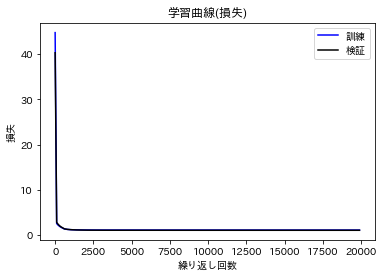

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

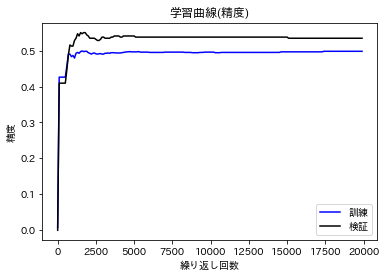

In [ ]:
# 学習曲線の表示 (精度)

plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()